In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [6]:
df = pd.read_csv('my_data4_pca.csv', index_col=0)
target = pd.read_csv('my_data3.csv', usecols=['gap'])
df.head(10)

Разделение целевой переменной "gap" на три категории на основе квантилей

In [3]:
quartiles = target.quantile([0.33, 0.66])
q1 = quartiles.iloc[0]
q2 = quartiles.iloc[1]
labels = np.where(target < q1, 0, np.where(target < q2, 1, 2))

Построение графиков на основе 3-х разных методов кластеризации

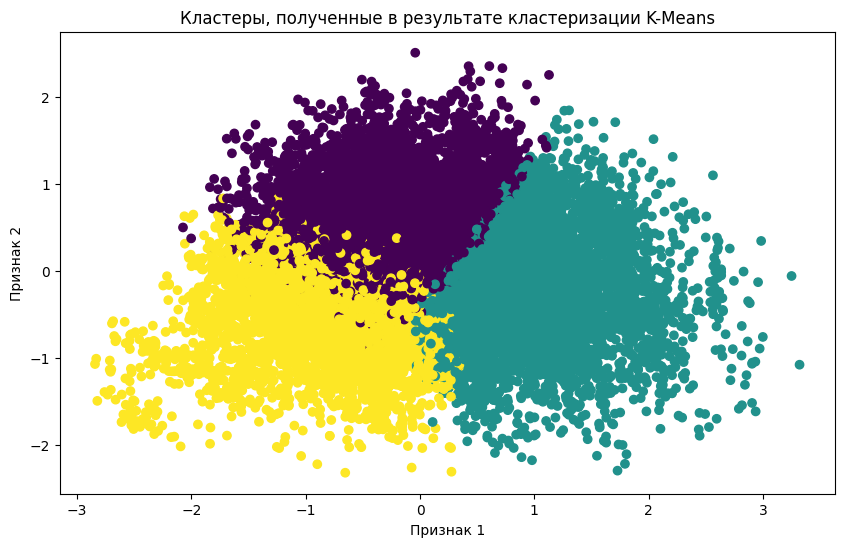

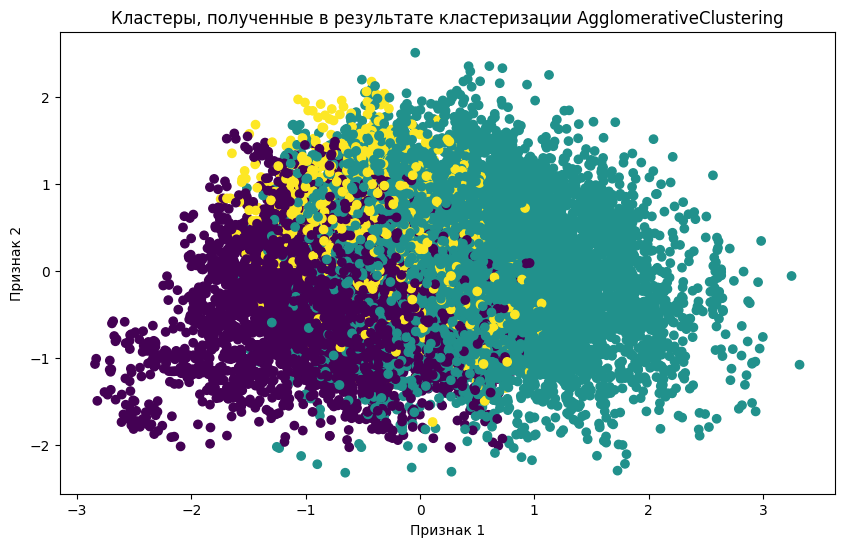

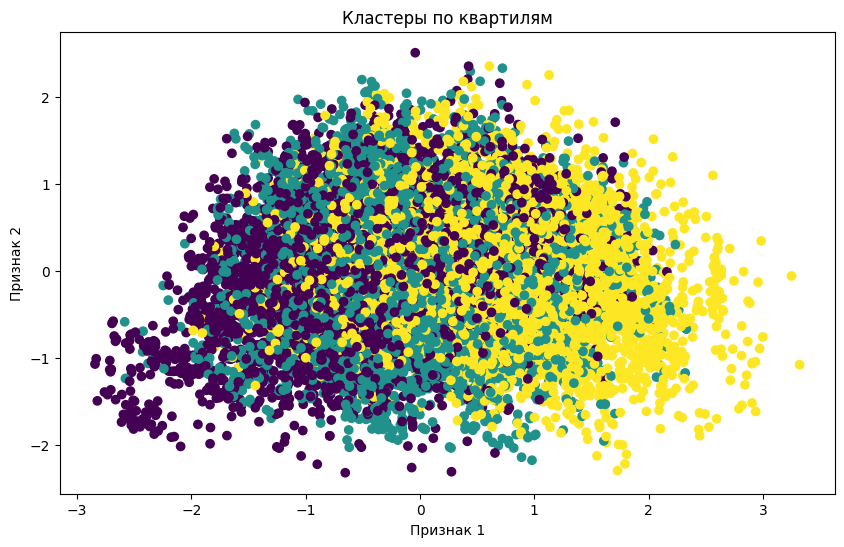

In [4]:
kmeans = KMeans(init="random", n_clusters=3,
                n_init=10,max_iter=300,random_state=42)
clusters_kmeans = kmeans.fit_predict(df)

agglomerative = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters_agglomerative = agglomerative.fit_predict(df)

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_kmeans)
plt.title('Кластеры, полученные в результате кластеризации K-Means')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_agglomerative)
plt.title('Кластеры, полученные в результате кластеризации AgglomerativeClustering')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.title('Кластеры по квартилям')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Silhouette Score (Коэффициент Силуэта): Это показатель, который оценивает, насколько каждый объект находится близко к остальным объектам в своем собственном кластере и одновременно далеко от объектов в соседних кластерах. Он принимает значения от -1 до 1, где значения ближе к 1 указывают на более качественную кластеризацию.
Adjusted Rand Index (ARI): Это индекс, который оценивает схожесть между двумя разбиениями данных, независимо от их масштаба. Значения ARI также варьируются от -1 до 1, где значения, близкие к 1, свидетельствуют о более сильной схожести между разбиениями.

Статистика по средним коэффициентам методов кластеризации и индексам ARI по наиболее интересным

In [5]:
silhouette_avg_quatiles = metrics.silhouette_score(df, labels.ravel())
silhouette_avg_kmeans = metrics.silhouette_score(df, clusters_kmeans.ravel())
silhouette_avg_agglomerative = metrics.silhouette_score(df, clusters_agglomerative.ravel())
adjusted_rand_kmeans = metrics.adjusted_rand_score(labels.ravel(), clusters_kmeans.ravel())
adjusted_rand_agglomerative = metrics.adjusted_rand_score(labels.ravel(), clusters_agglomerative.ravel())
print('Средний коэффициент силуэта по квартилям:', round(silhouette_avg_quatiles, 4), 
      '\nСредний коэффициент силуэта по kmeans:', round(silhouette_avg_kmeans, 4),
      '\nСредний коэффициент силуэта по agglomerative:', round(silhouette_avg_agglomerative, 4),
      '\nARI по kmeans:', round(adjusted_rand_kmeans, 4),
      '\nARI по agglomerative:', round(adjusted_rand_agglomerative, 4))

Средний коэффициент силуэта по квартилям: 0.0083 
Средний коэффициент силуэта по kmeans: 0.0735 
Средний коэффициент силуэта по agglomerative: 0.0697 
ARI по kmeans: 0.0658 
ARI по agglomerative: 0.0207


Коэффициент силуэта для алгоритма кластеризации kmeans оказался заметно выше, чем для метода agglomerative и предполагаемых "правильных" меток, определенных по квартилям. Это указывает на более сильную внутрикластерную связность и четкое разделение кластеров друг от друга при использовании алгоритма kmeans.
Индекс Adjusted Rand (ARI) для метода agglomerative превышает показатель метода kmeans, что свидетельствует о более точном соответствии кластеризации предполагаемым "правильным" меткам, основанным на разбиении по квартилям.